In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Limits

### Background

As we look to _calculus_ and beyond, allowing our inputs and outputs to _approach_ certain values (i.e. assume that they have come so close to a given value that they will actually take that value) is of much importance (see more [here](https://en.wikipedia.org/wiki/Limit_(mathematics))). This topic is called _limits_.

### Calculating interest

Let's say you've a friend who's always short on money. Maybe she's really into skiing and every time there's a big storm she's hopping on plane to go smear dat powdah, which is great - but also, expensive AF! She's been doing this a while and now she's gone broke.

Being the good friend that you are, you want her to be able to go skiing - but you are also taking a risk in loaning her money, as she might just keep skiing (heck, I would!) and never save up enough to pay you back. So you decide to _juice that loan_, i.e. require her to pay you out for the service of borrowing your money. Essesntially, you're going to rent her money.

How would we calculate the total amount that she owes you? Let's assume a _principal_ of $100.

### --

The simplest approach would be get $T$ or total due as:
- $(1 + r) \cdot P$
- where $P$ is the principal, and $r$ is the interest rate charged

In [3]:
def basic_total_due(principal, interest):
    return principal * (1 + interest / 100)

In [17]:
def plot_basic_interest(principal=100):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    interest_rates = np.linspace(0, 25)

    totals = []
    for i in interest_rates:
        totals.append(basic_total_due(principal, i))

    plot = plt.plot(interest_rates, totals)

    xlim = fig.axes[0].set_xlim(0, 25)

    xlab = fig.axes[0].set_xlabel("interest rate (%)")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title(f"Total due, based on: principal of ${principal}, across different interest rates")

    return ax

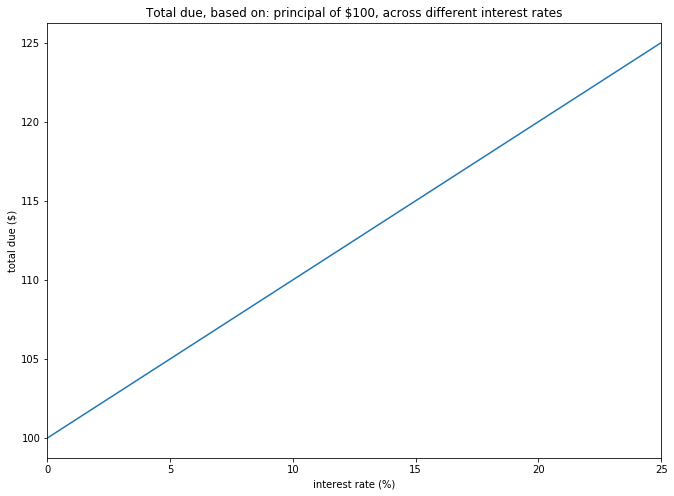

In [18]:
ax = plot_basic_interest()

### Breaking it into pieces

OK great, so we have an initial framework for charging our friend a lump sum, based on how high of a rate we set. What if we want something that allows us to distribute our accruals out, instead of charging it all at once?

### --

The math for this would look like:
- $T = (1 + \large \frac{m}{n} \small \cdot r) \cdot P$
- where $\large \frac{m}{n}$ refers to the ratio of _elapsed time_ to _time to total interest_
- e.g. if we are charging 20% for a month of lending, and 5 days had elapsed, $ \large \frac{m}{n} = \frac{5}{30}$

In [6]:
def basic_total_broken_up(principal, interest, periods_elapsed, periods_for_full_interest):
    return (1 + (periods_elapsed / periods_for_full_interest) * interest) * principal

In [15]:
def plot_basic_interest_broken_up(principal=100, interest=20, days_for_full_interest=30):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    days_elapsed = list(range(31))

    totals = []
    for p in days_elapsed:
        total_due = basic_total_broken_up(principal, interest / 100, p, days_for_full_interest)
        totals.append(total_due)

    plot = plt.plot(days_elapsed, totals)

    xlab = fig.axes[0].set_xlabel("days")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title(f"Total due, based on: principal ${principal}, and interest {interest}% per {days_for_full_interest} days")
    
    return ax

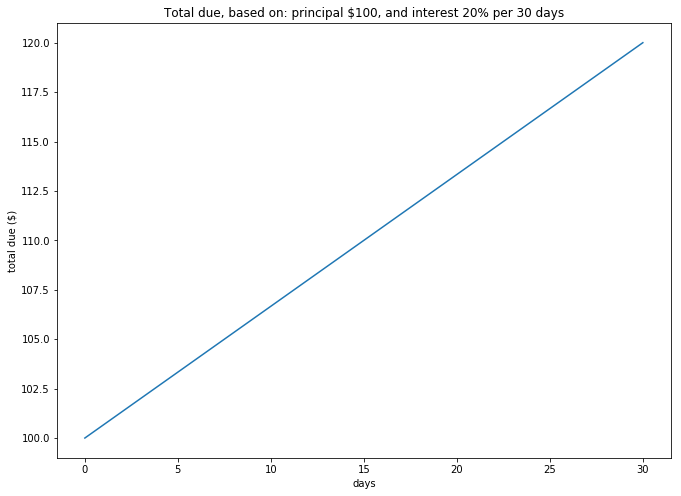

In [16]:
ax = plot_basic_interest_broken_up()

We can see that we work our way, _linearly_, up to our total of 120.

### Compounding

We've figured out how to calculate basic interest - i.e. interest that's calculated as simply a fee % on top of the principal. But does that _really_ account for all the risk associated with lending our friend money? Because her being _really_ late is different from her being just _a little_ late, right?

Enter: compounding! With _compound interest_, we apply the interest rate to the _total outstanding balance_, i.e. principal + interest (as it accrues) as opposed to just applying it to the principal.

To solve this one, let's reframe our problem a bit:
- 20% interest _per year_
- we are are compounding _each month_

### --

The math for this would look like:
- $T = (1 + \large \frac{r}{12} \small)^{12 \cdot y} \cdot P $
- where $y$ is the number of years that have elapsed

In [19]:
def compounded_total_due(principal, interest, compounds_per_year, years_elapsed):
    return (1 + interest / compounds_per_year) ** (compounds_per_year * years_elapsed) * principal

In [28]:
def plot_compounded_interest(principal=100, interest=20, compounds_per_year=12, max_years=4):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    years_elapsed = np.linspace(0, max_years)

    totals = []
    for p in years_elapsed:
        total_due = compounded_total_due(principal, interest / 100, compounds_per_year, p)
        totals.append(total_due)

    plot = plt.plot(years_elapsed, totals)

    xlab = fig.axes[0].set_xlabel("years_elapsed")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title("Total due, based on the years elapsed")
    
    return ax

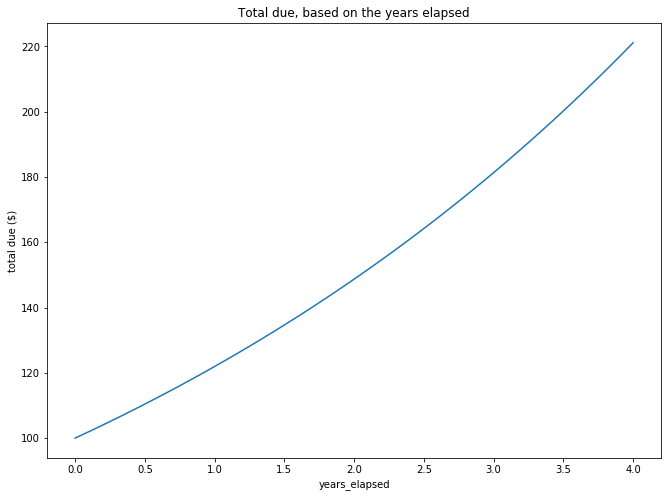

In [29]:
ax = plot_compounded_interest()

Question: do we see the total due increasing by 20 per year? No! In fact, the rate at which it is increasing is itself increasing. So, compounding is _great_ if you are on the receiving end of these payments, and not so much the other way, eh?

Now, what if we want to compare the simple, non-compound rate? Well, given a non-compounded rate $r$, the effective rate with compounding would be:
- $(1 + \frac{r}{n})^{n}-1$
- we are assuming a $y$ of 1 hear, FYI

See more [here](https://en.wikipedia.org/wiki/Interest). E.g.

In [ ]:
https://en.wikipedia.org/wiki/Interest

In [30]:
(1 + .2 / 12)** 12 - 1

0.21939108490523163

In [37]:
basic_total_broken_up(100, 0.21939108490523163, 1, 1)

121.93910849052317

In [38]:
compounded_total_due(100, 0.20, 12, 1)

121.93910849052317

### --

In [43]:
def plot_compounded_interest(principal=100, interest=20):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    compounds_per_year = range(1, 12)

    totals = []
    for c in compounds_per_year:
        total_due = compounded_total_due(principal, interest / 100, c, 1)
        totals.append(total_due)

    plot = plt.plot(compounds_per_year, totals)

    xlab = fig.axes[0].set_xlabel("compounds per year")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title("Total due, based on the compounds per year")
    
    return ax

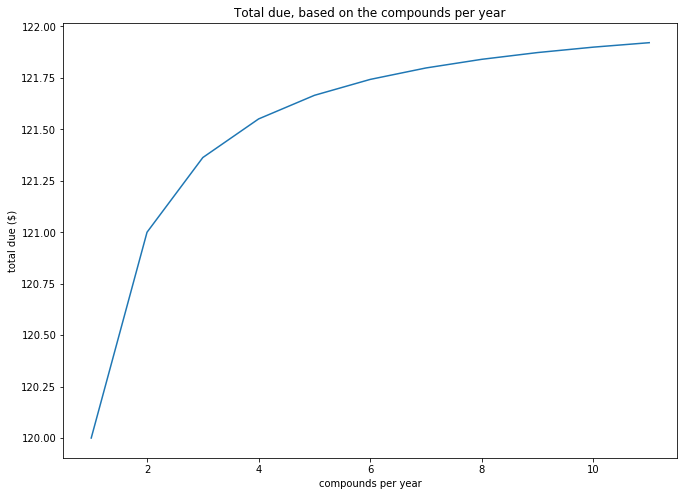

In [44]:
ax = plot_compounded_interest()

Oh, wow ... look at how that chart starts to flatten out! It's almost like, as you increase compound frequency, the total due will continue to increase, _up to a point_. Or, put differently, it looks like there is a _limit_ on where our total due will climb to (as compounding frequency alone is increased).

It turns out, that if we make some simplifying assumptions (that we have a principal of 1 and an interest rate of 100%), that the limit of our total due, as we let the number of compoundings climb to _infinity_, is ~2.71828, also known as $e$.

So, what is a limit? To me, the idea of a limit is a logical construct that allows for developing understandings around asymptotic behavior, if that makes sense? I.e. you set a boundary on a function and / or its input, and describe behaviors as you approach that boundary.